# 타원곡선

 : 유한체와 함께 블록체인의 핵심 알고리즘인 타원곡선 암호를 위한 빌드업 개념.

## 1. 타원곡선의 정의

$$y^2 = x^3+ax+b$$

 * y^2 항으로 x축에 대칭이 된다.
 * 계수값에 따라 곡선이 하나로 이어지지 않고 분리되기도 한다.
 * 3차 방정식 그래프에서 y > 0 의 곡선을 완만하게 하여 x축 대칭 시킨 것과 같은 모양이 됨.

 ## 2.1 secp256k1
  : 비트코인에서 사용되는 타원곡선
  $$y^2 = x^3 + 7$$

 * 곡선 자체보다 곡선 위의 '개별 점'들이 관심사
 * 특정 곡선의 한 점(point)으로 Point 클래스를 정의

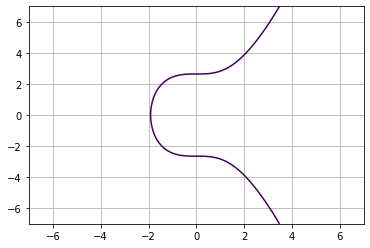

In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 7

y, x = np.ogrid[-7:7:100j, -7:7:100j]
plt.contour(x.ravel(), y.ravel(), pow(y, 2) - pow(x, 3) - x * a - b, [0])
plt.grid()
plt.show()

In [14]:
class Point:

    def __init__(self, x, y, a, b): # a, b는 타원곡선의 두 계수값. x, y는 주어진 point
        self.a = a
        self.b = b
        self.x = x
        self.y = y

        if self.x is None and self.y is None: # 무한원점 None인지 확인
            return

        if self.y**2 != self.x**3 + a * x + b: # 주어진 점이 곡선 위에 있는지 검사
            raise ValueError('({}, {}) is not on the curve'.format(x, y))

    def __eq__(self, other):  # 같은 곡선에 있고 좌표값이 동일해야 같다고 판정
        return self.x == other.x and self.y == other.y \
            and self.a == other.a and self.b == other.b
    
    def __ne__(self, other):
        return not (self == other)
    
    # 2.4 - 덧셈 연산
    def __add__(self, other): 
        if self.a != other.a or self.b != other.b:
            raise TypeError('Points {}, {} are not on the same curve'.format
            (self, other))

        # case (1) 무한원점인 경우
        if self.x is None: # 무한원점은 항등원이므로 자기자신인 other 반환
            return other
        if other.x is None: # 무한원점은 항등원이므로 자기자신인 self 반환
            return self
        
        if self.x == other.x and self.y != other.y: # 한 점에 그의 역원을 더하는 경우
            return self.__class__(None, None, self.a, self.b)
        
        # case (2) x1 != x2인 경우
        if self.x != other.x:
            s = (other.y - self.y) / (other.x - self.x)
            x3 = s**2 - self.x - other.x
            y3 = s * (self.x - x3) - self.y
            
            return self.__class__(x3, y3, self.a, self.b)
        
        # 예외처리
        if self == other and self.y == 0 * self.x:
            return self.__class__(None, None, self.a, self.b)
        
        # case (3) P1 = P2인 경우
        if self.x == other.x and self.y == other.y:
            s = (3 * pow(self.x, 2 + self.a)) / (2 * self.y)
            x3 = s**2 - 2 * self.x
            y3 = s * (self.x - x3) - self.y
            
            return self.__class__(x3, y3, self.a, self.b)

## 2.2 두 점의 덧셈

 : 두 점 A와 B를 지나는 직선이 타원과 만나는 교점 C를 x축으로 대칭시킨 점을 A + B로 정의함.
 * 점 덧셈의 결과를 쉽계 예측할 수 없는 성질
 * 즉 비선형적, 점 덧셈의 결과점은 곡선 위의 어느 위치도 가능한 것.

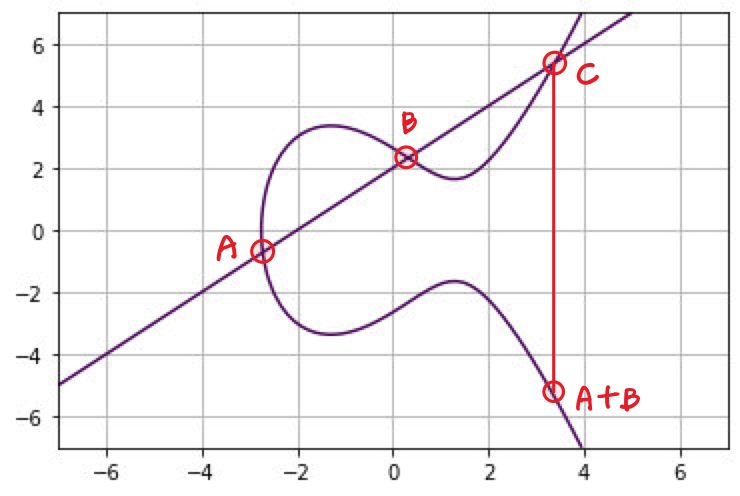

## 2.3 점 덧셈 성질

 * 항등원 존재 : 무한원점 I가 존재, I + A = A. 무한원점은 x축과 수직인 가상의 점들을 의미함.
 * 역원 존재 : A + (-A) = I
 * 교환법칙 성립
 * 결합법칙 성립

## 2.4 점 덧셈 코딩

### 1) 두 점이 x축에 수직인 직선 위에 있는 경우 (무한 원점)
 : 덧셈 결과값은 자기 자신이 된다
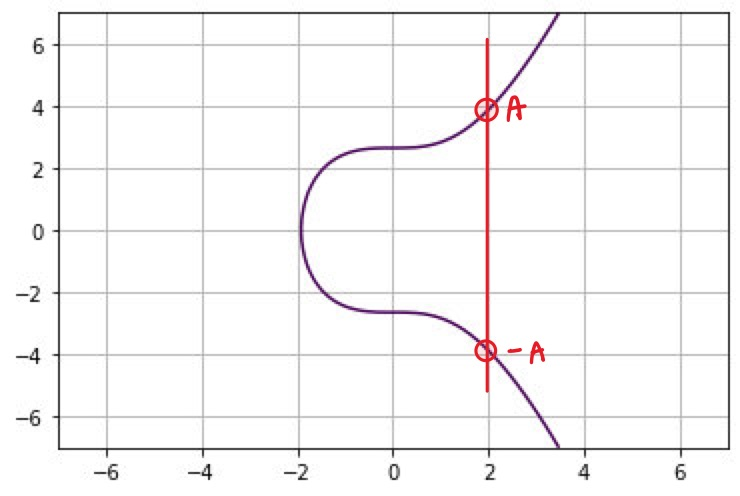

In [15]:
p1 = Point(-1, -1, 5, 7)
p2 = Point(-1, 1, 5, 7)
inf = Point(None, None, 5, 7)
print(p1 + inf)
print(inf + p2)
print(p1 + p2)

### 2) x1 != x2인 경우의 점 덧셈

$$x^3 = s^2 - x_1 - x_2 $$
$$y^3 = s(x - x_1) + y_1$$

### 3) P1 = P2인 경우의 점 덧셈
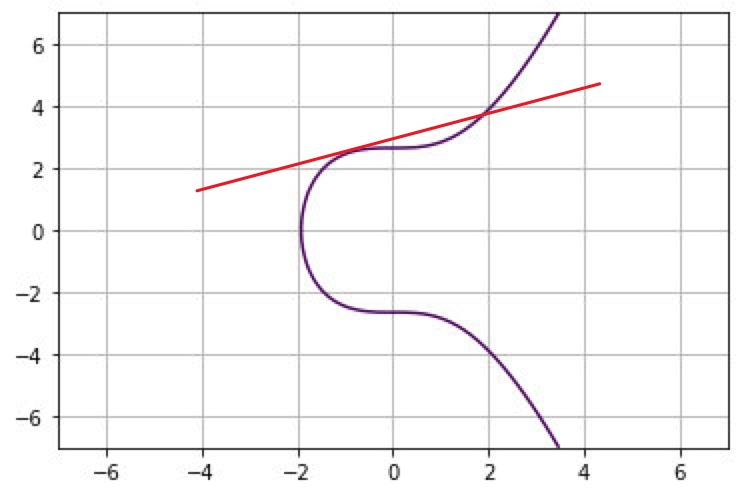

$$x_3 = s^2 - 2x_1$$
$$y_3 = s(x_1 - x_3) - y_1$$

### 4) 마지막 예외처리 코딩하기
 : 접선이 x축에 수직인 경우 P1 = P2이면서 y좌표가 0이므로 기울기 분모가 0이 되므로 계산 오류가 발생함.

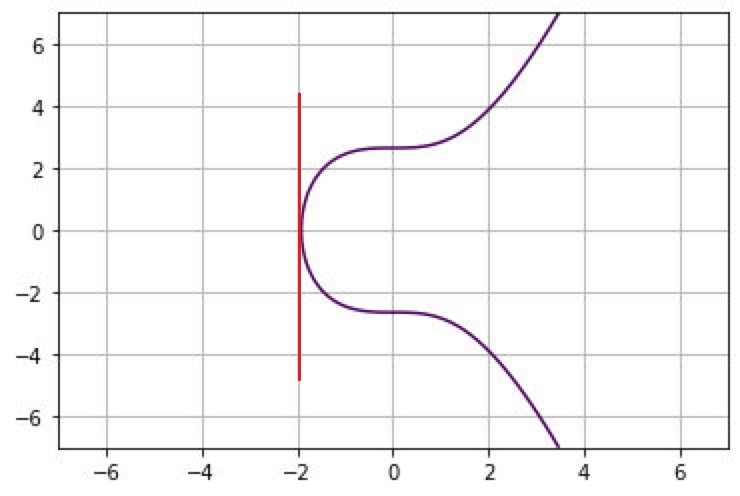